In [1]:
# Import our dependencies
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler,OneHotEncoder, MinMaxScaler
import pandas as pd
import tensorflow as tf
import numpy as np

# Import our input dataset
df = pd.read_csv('outliers_removed_sal-era-so.csv')
df

,Year,Full Name,Age,Salary,ERA,Hits,Earned Runs,Strike Outs,Home Runs,Wins,Losses,Outs Pitched,Batters Faced by Pitcher,Games Finished,Weight,Height,League,Team,Games Started
0,1990,AbbottJim,23,185000,4.51,246,106,105,16,10,14,635,925,0,200,75,AL,CAL,33
1,1990,AbbottPaul,23,100000,5.97,37,23,25,0,0,5,104,162,0,185,75,AL,MIN,7
2,1990,AldredScott,22,100000,3.77,13,6,7,0,1,2,43,63,0,195,76,AL,DET,3
3,1990,AndersonAllan,26,300000,4.53,214,95,82,20,7,18,566,797,0,178,71,AL,MIN,31
4,1990,AppierKevin,23,100000,2.76,179,57,127,13,12,8,557,784,1,180,74,AL,KCA,24
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4344,2016,WoodAlex,25,530000,3.73,56,25,66,5,1,4,181,255,0,215,76,NL,LAN,10
4345,2016,WorleyVance,29,2600000,3.53,84,34,56,11,2,2,260,365,13,240,74,AL,BAL,4
4346,2016,WrightMike,26,510500,5.79,81,48,50,12,3,4,224,328,5,240,78,AL,BAL,12
4347,2016,WrightSteven,32,514500,3.33,138,58,127,12,13,6,470,656,0,215,74,AL,BOS,24


In [2]:
# create log transformed column for salary
df['sal-log']=np.log10(df['Salary'])
df

,Year,Full Name,Age,Salary,ERA,Hits,Earned Runs,Strike Outs,Home Runs,Wins,Losses,Outs Pitched,Batters Faced by Pitcher,Games Finished,Weight,Height,League,Team,Games Started,sal-log
0,1990,AbbottJim,23,185000,4.51,246,106,105,16,10,14,635,925,0,200,75,AL,CAL,33,5.267172
1,1990,AbbottPaul,23,100000,5.97,37,23,25,0,0,5,104,162,0,185,75,AL,MIN,7,5.000000
2,1990,AldredScott,22,100000,3.77,13,6,7,0,1,2,43,63,0,195,76,AL,DET,3,5.000000
3,1990,AndersonAllan,26,300000,4.53,214,95,82,20,7,18,566,797,0,178,71,AL,MIN,31,5.477121
4,1990,AppierKevin,23,100000,2.76,179,57,127,13,12,8,557,784,1,180,74,AL,KCA,24,5.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4344,2016,WoodAlex,25,530000,3.73,56,25,66,5,1,4,181,255,0,215,76,NL,LAN,10,5.724276
4345,2016,WorleyVance,29,2600000,3.53,84,34,56,11,2,2,260,365,13,240,74,AL,BAL,4,6.414973
4346,2016,WrightMike,26,510500,5.79,81,48,50,12,3,4,224,328,5,240,78,AL,BAL,12,5.707996
4347,2016,WrightSteven,32,514500,3.33,138,58,127,12,13,6,470,656,0,215,74,AL,BOS,24,5.711385


In [3]:
### Drop unnecessary columns
df= df.filter(['Batters Faced by Pitcher','Outs Pitched','ERA','Strike Outs','Salary','sal-log','Home Runs','Games Started'])
df.head()

,Batters Faced by Pitcher,Outs Pitched,ERA,Strike Outs,Salary,sal-log,Home Runs,Games Started
0,925,635,4.51,105,185000,5.267172,16,33
1,162,104,5.97,25,100000,5.000000,0,7
2,63,43,3.77,7,100000,5.000000,0,3
3,797,566,4.53,82,300000,5.477121,20,31
4,784,557,2.76,127,100000,5.000000,13,24


In [ ]:
# create another df without games started


In [9]:
# Split our preprocessed data into our features and target arrays
y = df[['sal-log']].values
X = df.drop(["Salary", "sal-log"],1).values

# Split the preprocessed data into a training and testing dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1)

C:\Users\alyss\anaconda3\envs\mlenv\lib\site-packages\ipykernel_launcher.py:3: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  This is separate from the ipykernel package so we can avoid doing imports until


In [10]:
# Create a StandardScaler instance
scaler = StandardScaler()

# Fit the StandardScaler
X_scaler = scaler.fit(X_train)

# Scale the data
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)

In [24]:
# Define the model - deep neural net
number_input_features = len(X_train[0])
hidden_nodes_layer1 = 18
hidden_nodes_layer2 = 18
hidden_nodes_layer3 = 6


nn = tf.keras.models.Sequential()

# First hidden layer
nn.add(
    tf.keras.layers.Dense(units=hidden_nodes_layer1, input_dim=number_input_features, activation="relu")
)

# Second hidden layer
nn.add(tf.keras.layers.Dense(units=hidden_nodes_layer2, activation="relu"))

# third hidden layer
nn.add(tf.keras.layers.Dense(units=hidden_nodes_layer3, activation="relu"))

# Output layer
nn.add(tf.keras.layers.Dense(units=1, activation="linear"))

# Check the structure of the model
nn.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_12 (Dense)            (None, 18)                126       
                                                                 
 dense_13 (Dense)            (None, 18)                342       
                                                                 
 dense_14 (Dense)            (None, 6)                 114       
                                                                 
 dense_15 (Dense)            (None, 1)                 7         
                                                                 
Total params: 589
Trainable params: 589
Non-trainable params: 0
_________________________________________________________________


In [25]:
# Compile the model
nn.compile(loss="mean_squared_logarithmic_error", optimizer="adam", metrics=["mse"])

In [26]:
# Train the model
fit_model = nn.fit(X_train,y_train,epochs=200)

Epoch 1/200
102/102 [==============================] - 0s 644us/step - loss: 2.0475 - mse: 1981.1851
Epoch 2/200
102/102 [==============================] - 0s 703us/step - loss: 0.4415 - mse: 32.2245
Epoch 3/200
102/102 [==============================] - 0s 663us/step - loss: 0.1611 - mse: 6.6862
Epoch 4/200
102/102 [==============================] - 0s 673us/step - loss: 0.0999 - mse: 3.9648
Epoch 5/200
102/102 [==============================] - 0s 683us/step - loss: 0.0683 - mse: 2.7464
Epoch 6/200
102/102 [==============================] - 0s 693us/step - loss: 0.0484 - mse: 2.0119
Epoch 7/200
102/102 [==============================] - 0s 752us/step - loss: 0.0344 - mse: 1.4564
Epoch 8/200
102/102 [==============================] - 0s 723us/step - loss: 0.0287 - mse: 1.2998
Epoch 9/200
102/102 [==============================] - 0s 693us/step - loss: 0.0205 - mse: 0.9128
Epoch 10/200
102/102 [==============================] - 0s 634us/step - loss: 0.0168 - mse: 0.7605
Epoch 11/200
10

In [27]:
# Evaluate the model using the test data
model_loss, model_accuracy = nn.evaluate(X_test_scaled,y_test,verbose=2)
print(f"Loss: {model_loss*100:.2f}%, Accuracy: {model_accuracy*100:.2f}%")

34/34 - 0s - loss: 0.1732 - mse: 5.7589 - 101ms/epoch - 3ms/step
Loss: 17.32%, Accuracy: 575.89%


<AxesSubplot:>

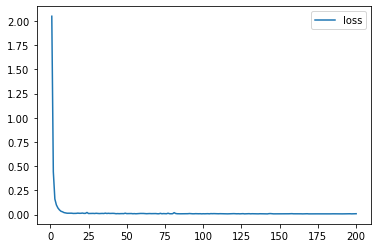

In [28]:
# Create a DataFrame containing training history
history_df = pd.DataFrame(fit_model.history, index=range(1,len(fit_model.history["loss"])+1))

# Plot the loss
history_df.plot(y="loss")

<AxesSubplot:>

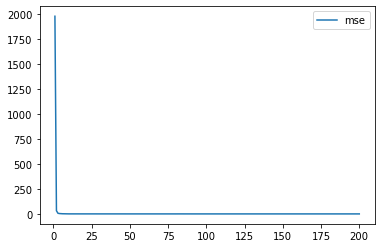

In [29]:
# Plot the accuracy
history_df.plot(y="mse")